In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor as RF

In [142]:
data = pd.read_csv('project/train.csv')

In [143]:
data.head(2)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.08904,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.00007,B,B,46,10309,1,240.0,1,16,B,300009.450063


In [144]:
data['Ecology_2'] = (data['Ecology_2'] == 'A').astype(int)

In [145]:
data['Ecology_3'] = (data['Ecology_3'] == 'A').astype(int)

In [146]:
data['Shops_2'] = (data['Shops_2'] == 'A').astype(int)

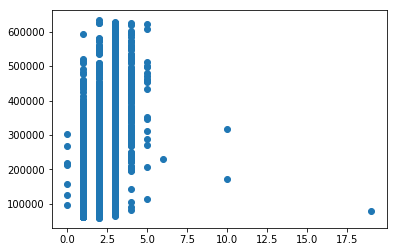

In [147]:
plt.scatter(data['Rooms'], data['Price'])

In [148]:
data = data.loc[data['Rooms'].between(1,5), :]

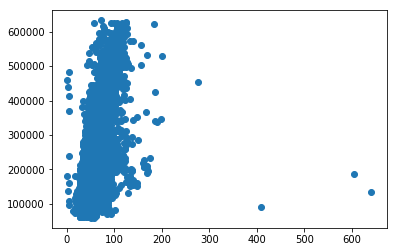

In [149]:
plt.scatter(data['Square'], data['Price'])

In [150]:
data = data.loc[data['Square'].between(19,250), :]

In [151]:
data = data.loc[~((data['Square']<data['LifeSquare']) &(data['HouseFloor']<data['Floor']) &(data['KitchenSquare'] <5))]

In [152]:
data.loc[data['Square']<data['LifeSquare'], 'Square'] = data['LifeSquare']

In [153]:
data.loc[data['LifeSquare']<15, 'LifeSquare'] =data['Square']

In [154]:
data['LifeSquare']=data['LifeSquare'].fillna(data['Square'])

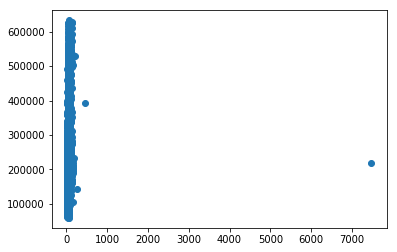

In [155]:
plt.scatter(data['LifeSquare'], data['Price'])

In [156]:
data = data.loc[data['LifeSquare'].between(0,350), :]

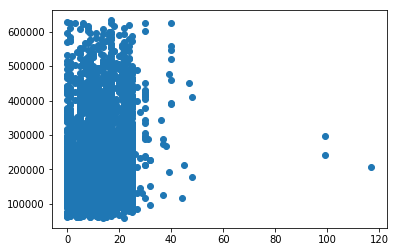

In [157]:
plt.scatter(data['HouseFloor'], data['Price'])

In [158]:
data = data.loc[data['HouseFloor']<60, :]

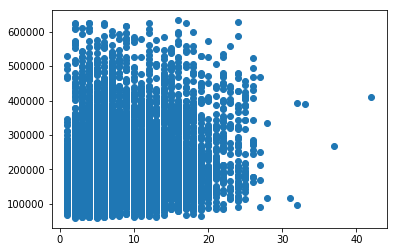

In [159]:
plt.scatter(data['Floor'], data['Price'])

In [160]:
data.loc[data['HouseFloor']==0, 'HouseFloor' ] = data['Floor']

In [161]:
train, valid = train_test_split(data, test_size = 0.20, random_state=42)

In [162]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [163]:
fts = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'HouseFloor','Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Shops_1', 'Shops_2', 'Helthcare_2']

In [164]:
lr = LinearRegression(fit_intercept=True, normalize=True)

In [165]:
lr.fit(train.loc[:, fts], train['Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [166]:
pred = lr.predict(train.loc[:, fts])

In [167]:
r2_score(train['Price'],pred)

0.4969748303136168

In [168]:
pred_valid = lr.predict(valid.loc[:, fts])

In [169]:
r2_score(valid['Price'],pred_valid)

0.5587673047287632

In [170]:
rf = RF(random_state=42, max_depth=12, n_estimators=30, min_samples_leaf=2 )

In [171]:
rf.fit(train.loc[:, fts], train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [172]:
pred = rf.predict(train.loc[:, fts])

In [173]:
r2_score(train['Price'],pred)

0.8679461377785613

In [174]:
pred_valid = rf.predict(valid.loc[:, fts])

In [175]:
r2_score(valid['Price'],pred_valid)

0.7517558818779551

In [176]:
test = pd.read_csv('project/test.csv')

In [177]:
test['Ecology_2'] = (test['Ecology_2'] == 'A').astype(int)

In [178]:
test['Ecology_3'] = (test['Ecology_3'] == 'A').astype(int)

In [179]:
test['Shops_2'] = (test['Shops_2'] == 'A').astype(int)

In [180]:
data.loc[data['Square']<data['LifeSquare'], 'Square'] = data['LifeSquare']

In [181]:
data.loc[data['LifeSquare']<15, 'LifeSquare'] =data['Square']

In [182]:
test['LifeSquare']=test['LifeSquare'].fillna(test['Square'])

In [183]:
data.loc[data['HouseFloor']==0, 'HouseFloor' ] = data['Floor']

In [184]:
pred_test = rf.predict(test.loc[:, fts])

In [185]:
test['Price'] = pred_test

In [186]:
test.loc[:, ['Id', 'Price']].to_csv('output/MKosareva_predictions.csv', index=None)